# Task: Geographic Analysis
Plot the locations of restaurants on a
map using longitude and latitude
coordinates.
Identify any patterns or clusters of
restaurants in specific areas.


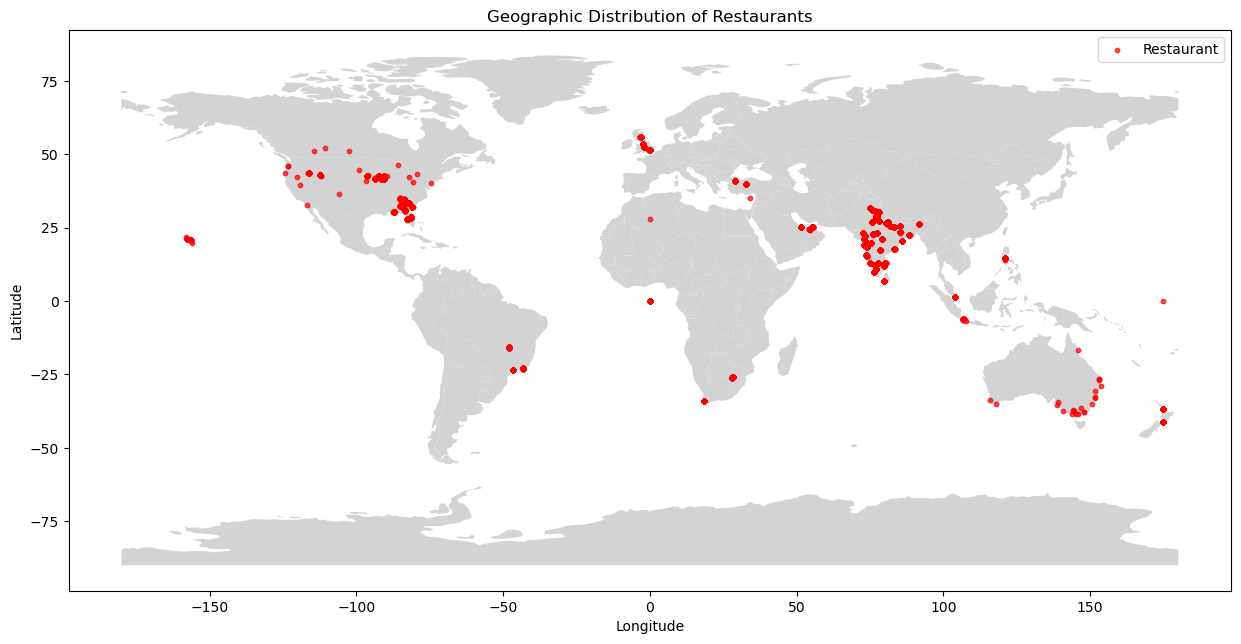

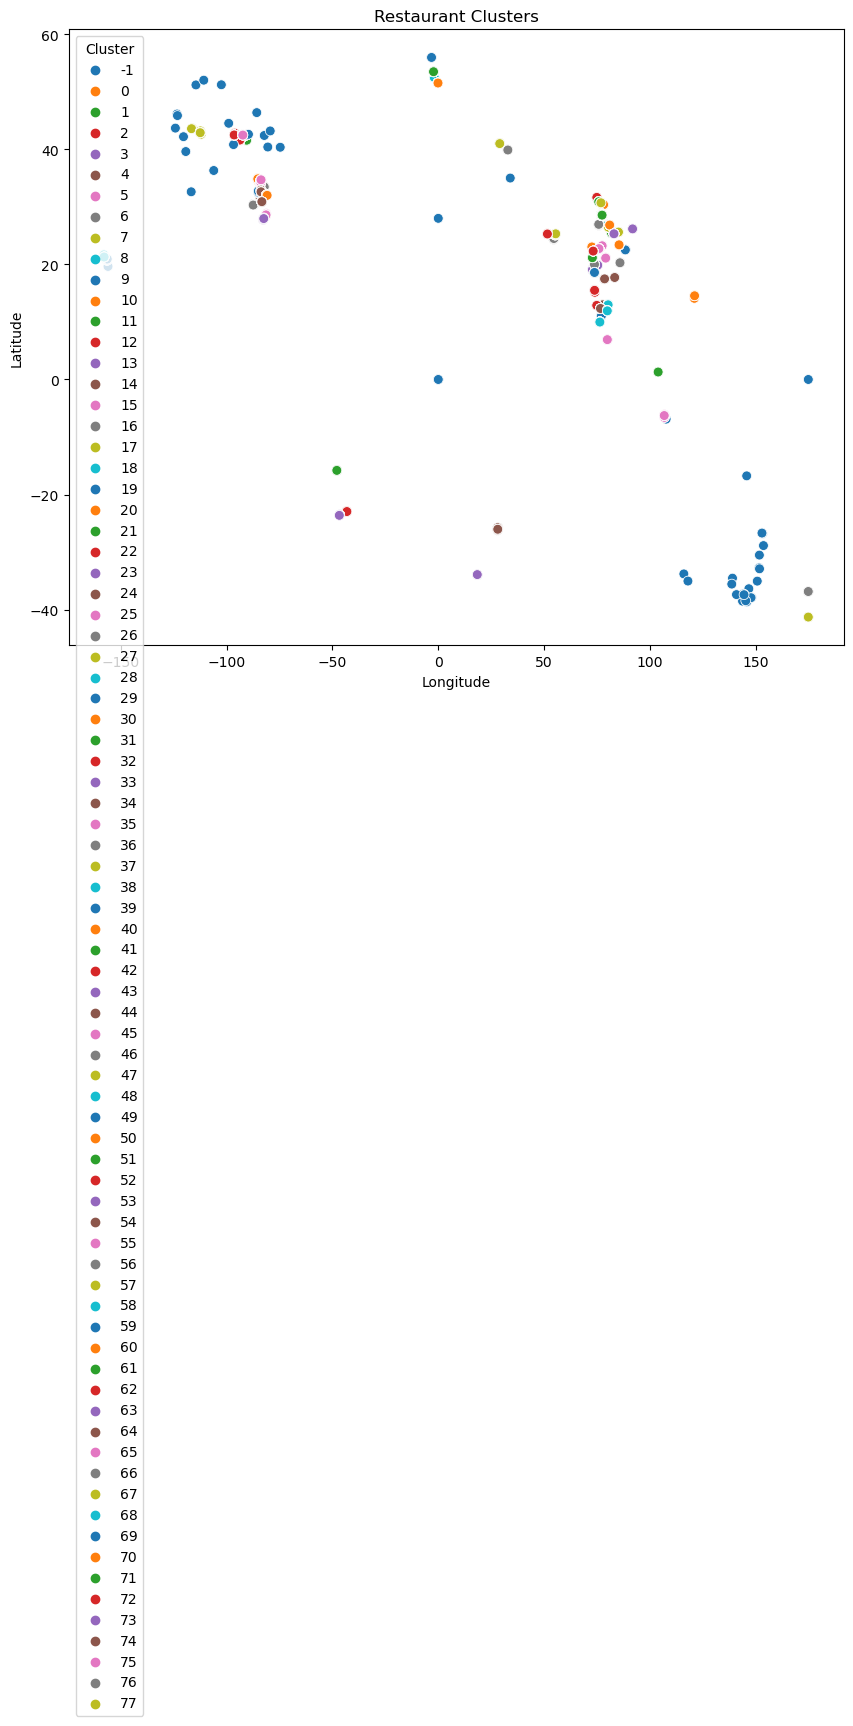

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import seaborn as sns
from sklearn.cluster import DBSCAN
import numpy as np

df=pd.read_csv("Dataset.csv")
df_cleaned=df.dropna(subset=['Longitude','Latitude'])

#Static Map with Matplotlib and Geopandas
geometry = [Point(xy) for xy in zip(df_cleaned['Longitude'], df_cleaned['Latitude'])]
gdf = gpd.GeoDataFrame(df_cleaned, geometry=geometry)
world = gpd.read_file('ne_110m_admin_0_countries.shx')

fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgray')
gdf.plot(ax=ax, markersize=10, color='red', alpha=0.7, label='Restaurant')
plt.title('Geographic Distribution of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

 
#Cluster Analysis
coords = df_cleaned[['Latitude', 'Longitude']].to_numpy()
clustering = DBSCAN(eps=0.01, min_samples=5, metric='haversine').fit(np.radians(coords))
df_cleaned['cluster'] = clustering.labels_

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Longitude', y='Latitude', hue='cluster', data=df_cleaned, palette='tab10', s=50
)
plt.title('Restaurant Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()